In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

filename = 'president_polls_2016.csv'
polls = pd.read_csv(filename)

In [2]:
with pd.option_context(\
                      'display.max_rows', 2,\
                      'display.max_columns', None):
    display(polls)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.0,43.0,4.0,NaN,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,6/9/2016,6/12/2016,Marquette University,A,666.0,lv,0.000000,46.0,37.0,NaN,NaN,46.40999,39.19839,NaN,NaN,NaN,https://law.marquette.edu/poll/2016/06/15/new-...,44341,66966,6/15/16,09:14:14 8 Nov 2016


# Clean the data

In [3]:
polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

In [4]:
polls.nunique(dropna=False)

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             352
enddate               345
pollster              196
grade                  11
samplesize           1767
population              4
poll_wt              4399
rawpoll_clinton      1312
rawpoll_trump        1385
rawpoll_johnson       585
rawpoll_mcmullin       17
adjpoll_clinton     12569
adjpoll_trump       12582
adjpoll_johnson      6630
adjpoll_mcmullin       58
multiversions           2
url                  1305
poll_id              4208
question_id          4208
createddate           222
timestamp               3
dtype: int64

In [5]:
polls.apply(pd.unique)

cycle                                                          [2016]
branch                                                    [President]
type                               [polls-plus, now-cast, polls-only]
matchup                               [Clinton vs. Trump vs. Johnson]
forecastdate                                                [11/8/16]
state               [U.S., New Mexico, Virginia, Iowa, Wisconsin, ...
startdate           [11/3/2016, 11/1/2016, 11/2/2016, 11/4/2016, 1...
enddate             [11/6/2016, 11/7/2016, 11/5/2016, 11/4/2016, 1...
pollster            [ABC News/Washington Post, Google Consumer Sur...
grade                       [A+, B, A-, B-, A, nan, B+, C+, C-, C, D]
samplesize          [2220.0, 26574.0, 2195.0, 3677.0, 16639.0, 129...
population                                             [lv, rv, a, v]
poll_wt             [8.720654, 7.628472, 6.424334, 6.087135, 5.316...
rawpoll_clinton     [47.0, 38.03, 42.0, 45.0, 48.0, 44.0, 46.0, 41...
rawpoll_trump       

In [6]:
polls.drop(columns=['cycle', 'branch', 'matchup', 'forecastdate'], inplace=True)

In [7]:
polls = polls.query('type == "now-cast"')
polls.drop(columns='type', inplace=True)

In [8]:
polls = polls.query("population in ['lv', 'rv']")

In [9]:
polls

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,...,45.23046,41.68534,4.649687,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:24:53 8 Nov 2016
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,...,43.36603,41.20737,5.175080,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:24:53 8 Nov 2016
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,...,42.05478,38.81421,6.840536,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:24:53 8 Nov 2016
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,...,45.60811,40.89765,6.074891,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:24:53 8 Nov 2016
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,...,46.93448,42.38145,3.773097,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:24:53 8 Nov 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,North Carolina,8/26/2016,8/27/2016,Public Policy Polling,B+,1177.0,lv,0.000000,45.00,44.00,...,44.40263,44.69241,NaN,NaN,NaN,http://nelpaction.org/wp-content/uploads/2016/...,45261,69614,9/1/16,09:24:53 8 Nov 2016
8412,North Carolina,3/9/2016,3/10/2016,SurveyUSA,A,1576.0,lv,0.000000,42.00,49.00,...,38.91546,48.83620,NaN,NaN,NaN,http://www.highpoint.edu/blog/2016/03/hpu-poll...,36589,65523,5/5/16,09:24:53 8 Nov 2016
8413,North Carolina,7/31/2016,8/2/2016,SurveyUSA,A,400.0,lv,0.000000,42.00,46.00,...,42.90049,48.56213,3.223028,NaN,NaN,https://www.nccivitas.org/2016/civitas-release...,44759,68485,8/3/16,09:24:53 8 Nov 2016
8414,Utah,8/5/2016,8/25/2016,Ipsos,A-,177.0,lv,0.000000,33.67,38.53,...,33.17161,40.04859,NaN,NaN,NaN,http://www.reuters.com/statesofthenation,45033,69086,8/26/16,09:24:53 8 Nov 2016


In [10]:
polls.loc[:, polls.nunique() == polls.shape[0]]

,poll_id,question_id
4208,48630,76192
4209,48847,76443
4210,48922,76636
4211,48687,76262
4212,48848,76444
...,...,...
8411,45261,69614
8412,36589,65523
8413,44759,68485
8414,45033,69086


In [11]:
polls.drop(columns=['poll_id', 'question_id'], inplace=True)

In [12]:
polls.loc[:, polls.columns.str.startswith('adjpoll')]

,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
4208,45.23046,41.68534,4.649687,NaN
4209,43.36603,41.20737,5.175080,NaN
4210,42.05478,38.81421,6.840536,NaN
4211,45.60811,40.89765,6.074891,NaN
4212,46.93448,42.38145,3.773097,NaN
...,...,...,...,...
8411,44.40263,44.69241,NaN,NaN
8412,38.91546,48.83620,NaN,NaN
8413,42.90049,48.56213,3.223028,NaN
8414,33.17161,40.04859,NaN,NaN


In [13]:
polls.drop(columns=polls.loc[:, polls.columns.str.startswith('adjpoll')].columns, inplace=True)

In [14]:
# polls = polls.loc[:, ~polls.columns.str.startswith("adjpoll")]

In [15]:
polls.drop(columns=['rawpoll_johnson', 'rawpoll_mcmullin'], inplace=True)

In [16]:
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,multiversions,url,createddate,timestamp
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00,NaN,https://www.washingtonpost.com/news/the-fix/wp...,11/7/16,09:24:53 8 Nov 2016
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69,NaN,https://datastudio.google.com/u/0/#/org//repor...,11/7/16,09:24:53 8 Nov 2016
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00,NaN,http://projects.fivethirtyeight.com/polls/2016...,11/8/16,09:24:53 8 Nov 2016
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,11/7/16,09:24:53 8 Nov 2016
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00,NaN,http://www.gravispolls.com/2016/11/final-natio...,11/7/16,09:24:53 8 Nov 2016


In [17]:
polls.loc[polls.multiversions.notna()]

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,multiversions,url,createddate,timestamp
4354,U.S.,11/1/2016,11/3/2016,Fox News/Anderson Robbins Research/Shaw & Comp...,A,1107.0,lv,2.211217e+00,45.50,44.00,*,http://www.foxnews.com/politics/interactive/20...,11/4/16,09:24:53 8 Nov 2016
4442,U.S.,10/22/2016,10/26/2016,Saint Leo University,C+,1050.0,lv,1.582383e+00,46.05,34.95,*,http://polls.saintleo.edu/clinton-lead-growing...,10/28/16,09:24:53 8 Nov 2016
4443,Florida,10/22/2016,10/26/2016,Saint Leo University,C+,1028.0,lv,1.567329e+00,50.40,36.95,*,http://polls.saintleo.edu/clinton-lead-growing...,10/28/16,09:24:53 8 Nov 2016
6911,Ohio,6/27/2016,6/28/2016,Gravis Marketing,B-,1270.0,rv,1.741500e-03,49.00,47.50,*,http://www.oann.com/pollohio/,7/1/16,09:24:53 8 Nov 2016
7270,Florida,6/27/2016,6/28/2016,Gravis Marketing,B-,1619.0,rv,5.198000e-04,48.50,48.50,*,http://www.oann.com/pollflorida/,7/1/16,09:24:53 8 Nov 2016
7341,Pennsylvania,6/27/2016,6/28/2016,Gravis Marketing,B-,1958.0,rv,4.080000e-04,49.50,48.00,*,http://www.oann.com/pollpenn/,7/1/16,09:24:53 8 Nov 2016
7843,U.S.,6/27/2016,6/28/2016,Gravis Marketing,B-,2162.0,rv,1.900000e-05,50.00,48.00,*,http://www.oann.com/pollnational/,7/1/16,09:24:53 8 Nov 2016
7907,U.S.,6/16/2016,6/16/2016,Gravis Marketing,B-,2197.0,rv,1.050000e-05,50.50,47.00,*,http://big.assets.huffingtonpost.com/NationalJ...,6/20/16,09:24:53 8 Nov 2016
8023,U.S.,5/10/2016,5/10/2016,Gravis Marketing,B-,1574.0,rv,1.370000e-06,49.50,47.50,*,http://www.oann.com/pollnational/,5/13/16,09:24:53 8 Nov 2016
8113,U.S.,12/2/2015,12/6/2015,Suffolk University,B+,1000.0,lv,1.040000e-07,47.50,44.00,*,http://www.usatoday.com/story/news/politics/el...,12/10/15,09:24:53 8 Nov 2016


In [18]:
polls.drop(columns='multiversions', inplace=True)

In [19]:
polls.drop(columns=['createddate', 'timestamp', 'url'], inplace=True)

In [20]:
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,2220.0,lv,8.720654,47.00,43.00
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,26574.0,lv,7.628472,38.03,35.69
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,2195.0,lv,6.424334,42.00,39.00
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,3677.0,lv,6.087135,45.00,41.00
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,16639.0,rv,5.316449,47.00,43.00


In [21]:
polls.rename(columns={'rawpoll_clinton':'clinton_pct',\
                     'rawpoll_trump':'trump_pct'}, inplace=True)

In [22]:
polls.select_dtypes('O')

,state,startdate,enddate,pollster,grade,population
4208,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,lv
4209,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,lv
4210,U.S.,11/2/2016,11/6/2016,Ipsos,A-,lv
4211,U.S.,11/4/2016,11/7/2016,YouGov,B,lv
4212,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,rv
...,...,...,...,...,...,...
8411,North Carolina,8/26/2016,8/27/2016,Public Policy Polling,B+,lv
8412,North Carolina,3/9/2016,3/10/2016,SurveyUSA,A,lv
8413,North Carolina,7/31/2016,8/2/2016,SurveyUSA,A,lv
8414,Utah,8/5/2016,8/25/2016,Ipsos,A-,lv


In [23]:
polls[['startdate', 'enddate']] = polls[['startdate', 'enddate']].apply(pd.to_datetime)

In [24]:
polls.state.unique()

array(['U.S.', 'New Mexico', 'Virginia', 'Iowa', 'Wisconsin',
       'North Carolina', 'Georgia', 'Florida', 'Oregon', 'Ohio',
       'South Carolina', 'New York', 'Michigan', 'Pennsylvania',
       'Missouri', 'New Hampshire', 'Arizona', 'Nevada', 'Colorado',
       'California', 'Washington', 'Texas', 'Utah', 'Illinois', 'Indiana',
       'Tennessee', 'Connecticut', 'Massachusetts', 'New Jersey',
       'Kansas', 'Kentucky', 'Minnesota', 'Oklahoma', 'Maryland',
       'Alabama', 'Nebraska', 'Louisiana', 'Maine', 'Arkansas', 'Alaska',
       'Vermont', 'Idaho', 'Mississippi', 'West Virginia', 'South Dakota',
       'Montana', 'Hawaii', 'Maine CD-1', 'Maine CD-2', 'Rhode Island',
       'Nebraska CD-1', 'Nebraska CD-3', 'Delaware', 'North Dakota',
       'District of Columbia', 'Nebraska CD-2', 'Wyoming'], dtype=object)

In [25]:
polls = polls.loc[~polls.state.str.contains('CD-')].copy()

<AxesSubplot:xlabel='enddate'>

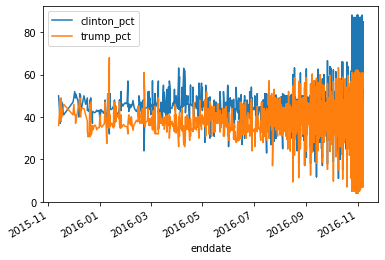

In [26]:
polls.plot.line(x='enddate', y=['clinton_pct', 'trump_pct'])

<AxesSubplot:xlabel='enddate'>

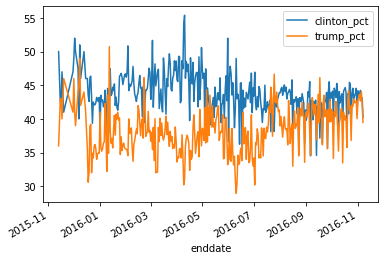

In [27]:
polls.groupby('enddate')[['clinton_pct', 'trump_pct']].mean().plot()

In [28]:
polls.to_pickle('polls_clean.pkl')

# Prepare the data

In [29]:
polls['voter_type'] = polls.population.replace({'lv':'likely', 'rv':'registered'})

In [30]:
polls.drop(columns='population', inplace=True)

In [31]:
polls['gap'] = polls.clinton_pct - polls.trump_pct

In [32]:
polls['state_gap'] = polls.groupby('state').gap.transform(func='mean')

In [33]:
polls['swing'] = (polls.state != "U.S.") & (abs(polls.state_gap ) < 7)

In [34]:
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,voter_type,gap,state_gap,swing
4208,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,8.720654,47.00,43.00,likely,4.00,4.347514,False
4209,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,7.628472,38.03,35.69,likely,2.34,4.347514,False
4210,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,6.424334,42.00,39.00,likely,3.00,4.347514,False
4211,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,6.087135,45.00,41.00,likely,4.00,4.347514,False
4212,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,5.316449,47.00,43.00,registered,4.00,4.347514,False


In [35]:
polls_long = polls.melt(id_vars=['state', 'enddate', 'voter_type', 'state_gap', 'swing'], \
                       value_vars=['clinton_pct', 'trump_pct'],\
                       var_name='candidate',\
                       value_name='percent')

In [36]:
polls_long['candidate'] = polls_long.candidate.str.replace("_pct", "").str.title()

In [37]:
polls_long.head()

,state,enddate,voter_type,state_gap,swing,candidate,percent
0,U.S.,2016-11-06,likely,4.347514,False,Clinton,47.00
1,U.S.,2016-11-07,likely,4.347514,False,Clinton,38.03
2,U.S.,2016-11-06,likely,4.347514,False,Clinton,42.00
3,U.S.,2016-11-07,likely,4.347514,False,Clinton,45.00
4,U.S.,2016-11-06,registered,4.347514,False,Clinton,47.00


<AxesSubplot:xlabel='enddate', ylabel='percent'>

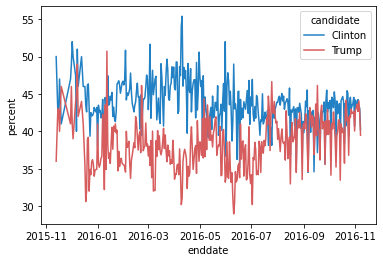

In [38]:
colors = ['#2281c4', '#d75c5d']
sns.set_palette(sns.color_palette(colors))
sns.lineplot(x='enddate', y='percent', data=polls_long, ci=None, hue='candidate')

In [39]:
import datetime as dt
dates = pd.date_range('10/01/2015', '12/01/2016', freq='M')
bin_labels = [dt.datetime.strftime(x, '%b %Y') for x in dates[1:]]
polls_long['month_bin'] = pd.cut(polls_long.enddate, bins=dates, labels=bin_labels)

In [40]:
polls_long


,state,enddate,voter_type,state_gap,swing,candidate,percent,month_bin
0,U.S.,2016-11-06,likely,4.347514,False,Clinton,47.00,Nov 2016
1,U.S.,2016-11-07,likely,4.347514,False,Clinton,38.03,Nov 2016
2,U.S.,2016-11-06,likely,4.347514,False,Clinton,42.00,Nov 2016
3,U.S.,2016-11-07,likely,4.347514,False,Clinton,45.00,Nov 2016
4,U.S.,2016-11-06,registered,4.347514,False,Clinton,47.00,Nov 2016
...,...,...,...,...,...,...,...,...
8227,North Carolina,2016-08-27,likely,1.368729,True,Trump,44.00,Aug 2016
8228,North Carolina,2016-03-10,likely,1.368729,True,Trump,49.00,Mar 2016
8229,North Carolina,2016-08-02,likely,1.368729,True,Trump,46.00,Aug 2016
8230,Utah,2016-08-25,likely,-7.103651,False,Trump,38.53,Aug 2016


In [41]:
polls_long['month_pct_avg'] = polls_long.groupby(['candidate', 'state','month_bin']).percent.transform('mean')

In [42]:
polls_long.head()

,state,enddate,voter_type,state_gap,swing,candidate,percent,month_bin,month_pct_avg
0,U.S.,2016-11-06,likely,4.347514,False,Clinton,47.00,Nov 2016,45.067903
1,U.S.,2016-11-07,likely,4.347514,False,Clinton,38.03,Nov 2016,45.067903
2,U.S.,2016-11-06,likely,4.347514,False,Clinton,42.00,Nov 2016,45.067903
3,U.S.,2016-11-07,likely,4.347514,False,Clinton,45.00,Nov 2016,45.067903
4,U.S.,2016-11-06,registered,4.347514,False,Clinton,47.00,Nov 2016,45.067903


In [43]:
polls.to_pickle('polls_prepared.pkl')
polls_long.to_pickle('polls_long.pkl')

In [44]:
# months = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
# def get_month(row):
#     month = months[row.enddate.month]
#     year = row.enddate.year
#     return month +' '+ str(year)

# polls_long['month_bin2'] = polls_long.apply(get_month, axis=1)

# Analyze the date

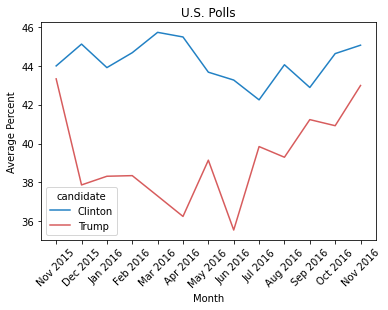

In [45]:

ax = sns.lineplot(data=polls_long.query('state == "U.S."'), x='month_bin', y='month_pct_avg', hue='candidate', ci=None)
ax.set(title='U.S. Polls', xlabel='Month', ylabel='Average Percent')
ax.tick_params('x', labelrotation=45)

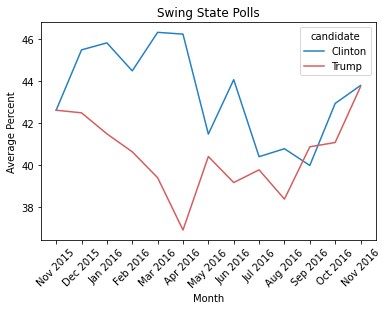

In [46]:
ax = sns.lineplot(data=polls_long.query("swing == True"), x='month_bin', y='month_pct_avg', hue='candidate', ci=None)
ax.set(title='Swing State Polls', xlabel='Month', ylabel='Average Percent')
ax.tick_params('x', labelrotation=45)

In [47]:
polls_long.query('swing == True').groupby(['voter_type', 'candidate']).percent.agg(['mean', 'std']).unstack(-1)

mean                  std          
candidate     Clinton      Trump   Clinton     Trump
voter_type                                          
likely      42.339206  41.223044  4.672971  5.497081
registered  42.771795  40.431624  4.433704  4.564361

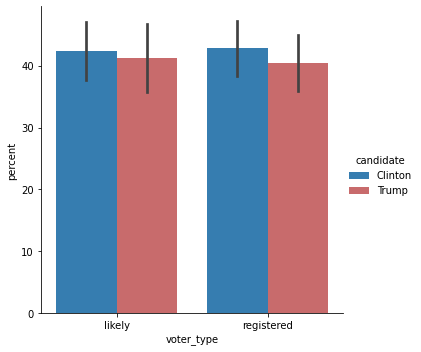

In [48]:
sns.catplot(data=polls_long.query('swing == True'), x='voter_type', y='percent', kind='bar', hue='candidate', ci='sd')

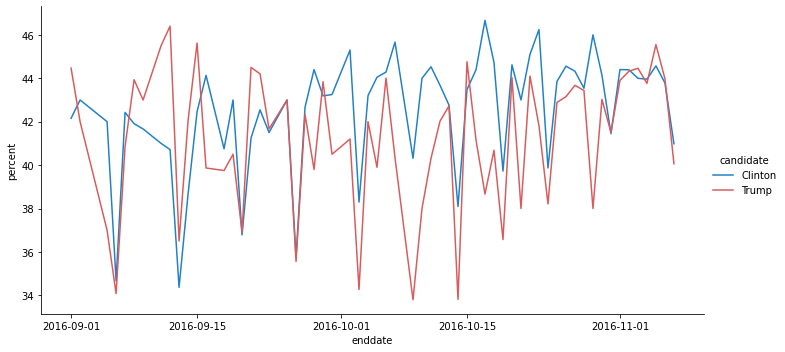

In [49]:
g = sns.relplot(data=polls_long.query('voter_type == "likely" & swing == True & enddate >= "2016-09"'),\
               kind='line', x='enddate', y='percent', ci=None, hue='candidate', aspect=2)


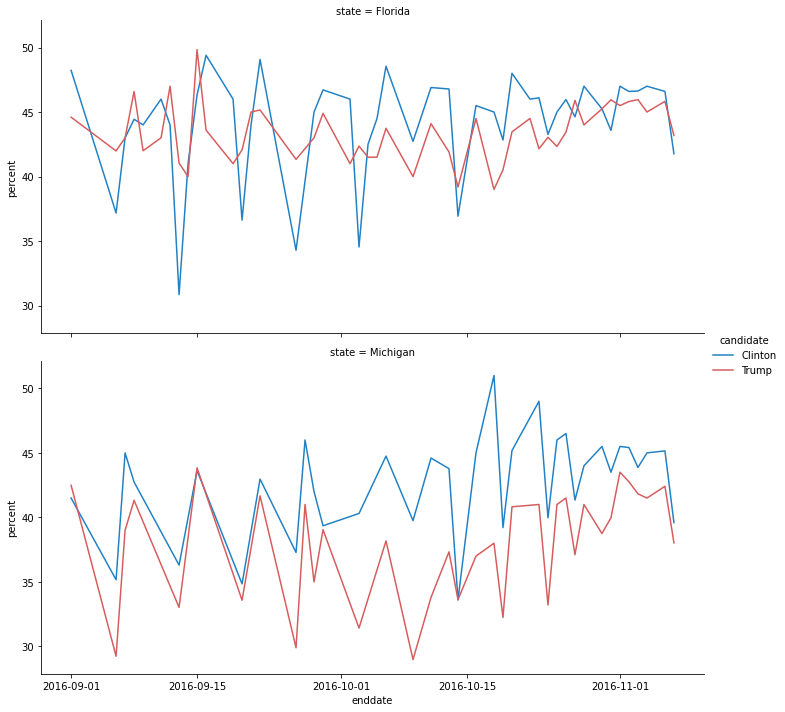

In [50]:
sns.relplot(data=polls_long.query('state in ["Michigan", "Florida"] & enddate >= "2016-09" & voter_type == "likely"'),\
           kind='line', x='enddate', y='percent', hue='candidate', ci=None, col='state', col_wrap=1, aspect=2)

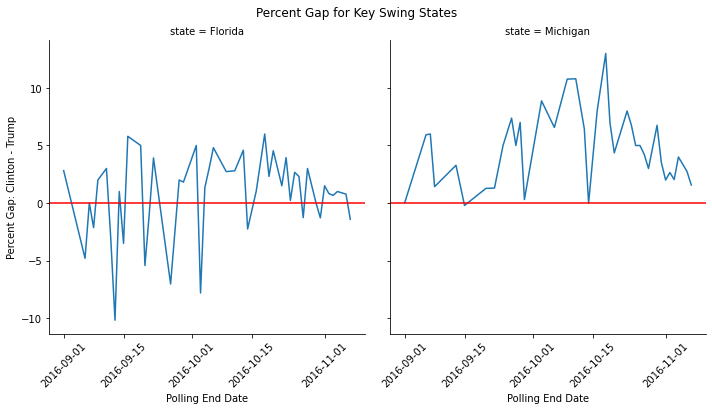

In [51]:
sns.set_palette(sns.color_palette("tab10"))

g = sns.relplot(data=polls.query('state==["Michigan", "Florida"] & enddate >= "2016-09"'),\
               kind='line', x='enddate', y='gap', ci=None, col='state', col_wrap=2)
g.fig.suptitle("Percent Gap for Key Swing States", y=1.025)
g.set(xlabel='Polling End Date', ylabel='Percent Gap: Clinton - Trump')

for ax in g.axes.flat:
    ax.tick_params('x', labelrotation=45)
    ax.axhline(y=0, color='r')


In [52]:
polls.loc[polls.swing == True, 'state'].unique()

array(['Iowa', 'Wisconsin', 'North Carolina', 'Georgia', 'Florida',
       'Ohio', 'South Carolina', 'Michigan', 'Pennsylvania', 'Missouri',
       'New Hampshire', 'Arizona', 'Nevada', 'Colorado', 'Kansas'],
      dtype=object)

In [53]:
polls

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,voter_type,gap,state_gap,swing
4208,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,8.720654,47.00,43.00,likely,4.00,4.347514,False
4209,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,7.628472,38.03,35.69,likely,2.34,4.347514,False
4210,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,6.424334,42.00,39.00,likely,3.00,4.347514,False
4211,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,6.087135,45.00,41.00,likely,4.00,4.347514,False
4212,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,5.316449,47.00,43.00,registered,4.00,4.347514,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,North Carolina,2016-08-26,2016-08-27,Public Policy Polling,B+,1177.0,0.000000,45.00,44.00,likely,1.00,1.368729,True
8412,North Carolina,2016-03-09,2016-03-10,SurveyUSA,A,1576.0,0.000000,42.00,49.00,likely,-7.00,1.368729,True
8413,North Carolina,2016-07-31,2016-08-02,SurveyUSA,A,400.0,0.000000,42.00,46.00,likely,-4.00,1.368729,True
8414,Utah,2016-08-05,2016-08-25,Ipsos,A-,177.0,0.000000,33.67,38.53,likely,-4.86,-7.103651,False


In [54]:
polls.head()

,state,startdate,enddate,pollster,grade,samplesize,poll_wt,clinton_pct,trump_pct,voter_type,gap,state_gap,swing
4208,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,8.720654,47.00,43.00,likely,4.00,4.347514,False
4209,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,7.628472,38.03,35.69,likely,2.34,4.347514,False
4210,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,6.424334,42.00,39.00,likely,3.00,4.347514,False
4211,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,6.087135,45.00,41.00,likely,4.00,4.347514,False
4212,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,5.316449,47.00,43.00,registered,4.00,4.347514,False


In [55]:
polls_gap = polls.query('state == ["Wisconsin", "Arizona", "Pennsylvania", "Nevada", "Iowa", "Florida", "North Carolina", "Ohio"]\
            & enddate >= "2016-11-01"')[['state', 'gap']]
polls_gap = polls_gap.groupby("state").mean()
polls_gap

,gap
state,
Arizona,-1.758824
Florida,0.727917
Iowa,-4.369286
Nevada,0.436087
North Carolina,2.365455
Ohio,-1.654545
Pennsylvania,2.885000
Wisconsin,4.766250


In [56]:
polls_gap['advantage'] = polls_gap.apply(lambda x: "Clinton" if x.gap > 0 else "Trump", axis=1)
polls_gap['gap'] = abs(polls_gap.gap)
polls_gap.reset_index(inplace=True)

In [57]:
polls_gap

,state,gap,advantage
0,Arizona,1.758824,Trump
1,Florida,0.727917,Clinton
2,Iowa,4.369286,Trump
3,Nevada,0.436087,Clinton
4,North Carolina,2.365455,Clinton
5,Ohio,1.654545,Trump
6,Pennsylvania,2.885000,Clinton
7,Wisconsin,4.766250,Clinton


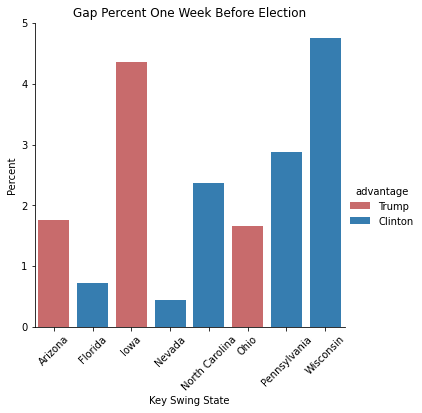

In [58]:
sns.set_palette(sns.color_palette(['#d75c5d', '#2281c4']))

g = sns.catplot(data=polls_gap, x='state', y='gap', kind='bar', hue='advantage', dodge=False)

# ax = g.axes.flat[0]
# ax.set(title='Gap Percent One Week Before Election', xlabel='Key Swing State', ylabel="Percent")
# ax.tick_params('x', labelrotation=45)
for ax in g.axes.flat:
    ax.set(title='Gap Percent One Week Before Election', xlabel='Key Swing State', ylabel="Percent")
    ax.tick_params('x', labelrotation=45)
    
g.fig.subplots_adjust(top=0.9)
g.fig.subplots_adjust(bottom=0.35)
g.fig.savefig('swing_state_gap_bar.png')

In [62]:
polls_heat = polls[['state', 'enddate', 'samplesize', 'clinton_pct', 'trump_pct', 'swing']].copy()
polls_heat = polls_heat.query('swing == True')

In [63]:
polls_heat.head()

,state,enddate,samplesize,clinton_pct,trump_pct,swing
4223,Iowa,2016-11-04,800.0,39.0,46.0,True
4225,Wisconsin,2016-10-31,1255.0,46.0,40.0,True
4226,North Carolina,2016-11-06,800.0,44.0,44.0,True
4227,Georgia,2016-11-06,1200.0,46.0,49.0,True
4228,Florida,2016-11-06,884.0,46.0,45.0,True


In [72]:
def get_voter_count(df, candidate_pct):
    return df.samplesize * df[candidate_pct]

polls_heat['clinton_count'] = get_voter_count(polls_heat, 'clinton_pct')
polls_heat['trump_count'] = get_voter_count(polls_heat, 'trump_pct')

In [74]:
polls_heat = polls_heat[['state', 'clinton_count', 'trump_count', 'enddate']]

In [84]:
dates = pd.date_range('09-01-2016', '11-13-2016', freq='w')
bin_labels = [dt.datetime.strftime(x, '%d %b') for x in dates[1:]]
polls_heat['weekly_bin'] = pd.cut(polls_heat.enddate, bins=dates, labels=bin_labels)

C:\Users\hoang\AppData\Local\Temp/ipykernel_10076/1178413587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polls_heat['weekly_bin'] = pd.cut(polls_heat.enddate, bins=dates, labels=bin_labels)


In [85]:
polls_heat.head()

,state,clinton_count,trump_count,enddate,weekly_bin
4223,Iowa,31200.0,36800.0,2016-11-04,06 Nov
4225,Wisconsin,57730.0,50200.0,2016-10-31,06 Nov
4226,North Carolina,35200.0,35200.0,2016-11-06,06 Nov
4227,Georgia,55200.0,58800.0,2016-11-06,06 Nov
4228,Florida,40664.0,39780.0,2016-11-06,06 Nov


In [91]:
polls_heat = polls_heat.groupby(['state', 'weekly_bin']).sum()

In [98]:
polls_heat['gap'] = 100 * (polls_heat['clinton_count'] - polls_heat['trump_count']) / (polls_heat['clinton_count'] + polls_heat['trump_count'])

In [107]:
polls_heat = polls_heat[['gap']].round(1)

In [114]:
polls_heat = polls_heat.unstack().droplevel(level=0, axis=1)


In [115]:
polls_heat

weekly_bin,11 Sep,18 Sep,25 Sep,02 Oct,09 Oct,16 Oct,23 Oct,30 Oct,06 Nov,13 Nov
state,,,,,,,,,,
Arizona,-3.0,-4.7,-0.6,0.8,0.9,0.6,5.1,-0.3,-1.4,4.0
Colorado,5.7,2.1,1.3,7.8,6.4,9.5,7.3,7.0,4.5,7.0
Florida,-1.9,-4.3,-3.0,0.5,0.8,2.3,3.5,1.9,0.9,0.3
Georgia,-8.4,-7.3,-8.0,-12.6,-14.4,-5.1,-3.6,-2.8,-2.9,-0.9
Iowa,0.4,-9.1,-6.0,0.0,2.8,-1.3,2.9,-2.2,-6.7,-8.4
Kansas,-10.6,-1.7,-4.0,-7.1,-4.2,-7.4,-3.5,-13.2,-14.2,-9.8
Michigan,6.0,2.8,3.1,6.4,12.2,9.7,10.4,5.8,3.3,2.2
Missouri,-5.5,-10.8,-9.1,-8.8,1.7,-3.8,-5.4,-11.9,-11.0,-5.6
Nevada,1.7,-4.0,-1.8,2.5,3.6,2.4,2.7,0.2,0.4,1.5


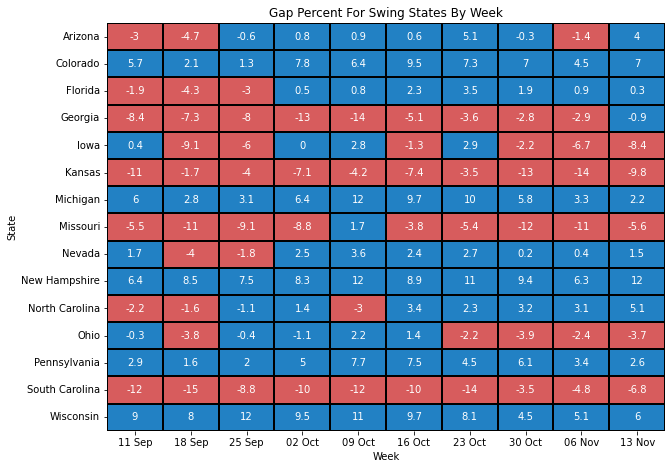

In [137]:
colors = ['#d75c5d', '#2281c4']
fig, ax = plt.subplots(figsize=(10,7.5))
sns.heatmap(data=polls_heat, cmap=colors, linecolor='black', linewidths=0.01, cbar=False, annot=True)

ax.set(title='Gap Percent For Swing States By Week', xlabel='Week', ylabel='State')

fig.savefig('swing_states_gap_heatmap.png')